In [1]:
# nltk.download()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

#### Get all files in the Statements folder

In [3]:
import glob
import os

folder_path = "Statements"  # Replace with the path to your folder

# Get all file paths in the folder
file_paths = glob.glob(folder_path + "/*")

all_files = []
# Iterate over the file paths and print their names
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    all_files.append(file_name)
print(all_files)

['2018.01.31 GoGet.txt', '2018.03.22 Facebook.txt', '2018.03.29 Under Armour.txt', '2018.05.06 PageUp People.txt', '2018.05.14 Family Planning NSW.txt', '2018.06.04 MyHeritage.txt', '2018.06.04 Southport Sharks.txt', '2018.06.14 Motorcycle Accessories Supermarket Pty Ltd.txt', '2018.06.22 PEXA.txt', '2018.07.04 RCR Tomlinson.txt', '2018.09.08 The Perth Mint.txt', '2018.09.28 Facebook.txt', '2018.11.01 Austal.txt', '2018.11.30 Marriott.txt', '2018.12.27 Nova.txt', '2019.01.05 Early Warning Network.txt', '2019.02.05 Landmark White.txt', '2019.02.14 Coffee Meets Bagel.txt', '2019.03.13 Kathmandu.txt', '2019.05.24 Canva.txt', '2019.06.04 Australian National University.txt', '2019.06.17 Australian Catholic University.txt', '2019.07.26 NAB.txt', '2019.07.29 Sephora.txt', '2019.10.17 Optus.txt', '2019.11.12 Monash IVF.txt', '2019.12.02 Vistaprint.txt', '2019.12.10 Australian Sports Commission.txt', '2020.01.16 P&N Bank.txt', '2020.03.11 Melbourne Polytechnic.txt', '2020.03.23 Henning Harders.

#### Number of statements

In [4]:
len(all_files)

101

#### Read each file / statement into a string

In [5]:
def read_file_as_string(file_path):
    with open('Statements/'+file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        text = ' '.join(lines).replace("\n", "")
    return text

In [6]:
from datetime import datetime

statements = []
companies = []
dates = []
years = []

# Function to format date
def format_date(date):
    # Get date
    date_str = date

    # Convert the date string to a datetime object
    try:
        date_obj = datetime.strptime(date_str, "%Y.%m.%d")
        # Convert the datetime object to the desired format
        formatted_date = date_obj.strftime("%d/%m/%Y")
        return formatted_date
    except ValueError:
        return None  

for file_name in all_files:
    # Get statement
    statements.append(read_file_as_string(file_name))
    # Get company name from file name
    companies.append(file_name[11:-4])
    
    # Transform date into correct datetime format
    date = file_name[:10]
    formatted_date = format_date(date)
    dates.append(formatted_date)
    
    # Get year
    year = int(file_name[:4])
    years.append(year)

In [7]:
data = {'Name': companies, 'NotificationDate': dates, 'Year': years, 'Statement': statements}
df = pd.DataFrame(data=data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              101 non-null    object
 1   NotificationDate  101 non-null    object
 2   Year              101 non-null    int64 
 3   Statement         101 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [8]:
df.head()

,Name,NotificationDate,Year,Statement
0,GoGet,31/01/2018,2018,A statement from GoGet’s CEO To our valued mem...
1,Facebook,22/03/2018,2018,I want to share an update on the Cambridge Ana...
2,Under Armour,29/03/2018,2018,To the MyFitnessPal Community: We are writing...
3,PageUp People,06/05/2018,2018,Information update 5 June 2018 As part of our...
4,Family Planning NSW,14/05/2018,2018,We are writing to personally inform you and ap...


#### Determine the number of rows and columns in the dataset

In [9]:
df.shape

(101, 4)

#### Find number of rows

In [10]:
len(df)

101

In [11]:
df['Year'].value_counts()

2022    27
2020    22
2023    17
2018    15
2019    13
2021     7
Name: Year, dtype: int64

### Plot year

In [12]:
#function to display values on barcharts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height(), fontsize=14)
                ax.text(_x, _y, value, ha="center", fontsize=12) 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width(), fontsize=14)
                ax.text(_x, _y, value, ha="left", fontsize=12)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

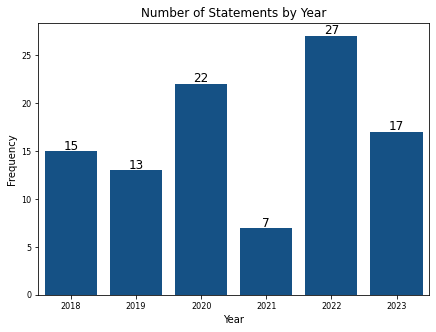

In [13]:
value_counts = df['Year'].value_counts()

# Create bar plot
plt.figure(figsize=(7, 5))
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Statements by Year')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Ref: https://github.com/j-hartmann/siebert/blob/main/SieBERT.ipynb

In [14]:
# Check version of transformers
import transformers
print(transformers.__version__)     

4.27.4


In [15]:
# load dependencies
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# specify path of pretrained model
checkpoint = "siebert/sentiment-roberta-large-english"  # SieBERT

# load pretrained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [50]:
def get_sentiment(text):
    sequences = sent_tokenize(text)

    # tokenize sequences
    tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

    # predict with model
    output = model(**tokens)

    # transform logits to class labels
    predictions = torch.nn.functional.softmax(output.logits, dim=-1)

    confidences = predictions.max(1)[0].tolist()

    classes = predictions.argmax(-1).tolist()

    # labels = pd.Series(classes).map(model.config.id2label)
    
    # consolidate results into a dataframe
    sentiment = pd.DataFrame(list(zip(classes, confidences)), columns=['class', 'confidence'])
    
    # Get counts
    sent_count = sentiment['class'].value_counts()
    
    # Count of positive sentences
    pos_cnt = sent_count[1]

    # Count of negative sentences
    neg_cnt = sent_count[0]
    
    # Get averages of confidence scores
    confi_avg = sentiment.groupby('class')['confidence'].mean()
    
    # Average of positive
    pos_avg = confi_avg[1]
    
    # Average of negative
    neg_avg = confi_avg[0]
    
    return pos_cnt, neg_cnt, pos_avg, neg_avg

In [53]:
df['SentimentScores'] = df['Statement'].apply(lambda x: get_sentiment(x))

In [55]:
df.to_csv('sentiment', index=False)

### Stop here for sentiment analysis.

### Create new notebook for sentiment analysis

### Duplicate this notebook for other features

In [21]:
# Calculate averages of probabilities
import statistics as stats

print(stats.mean(confidences))

0.9948539018630982


In [23]:
# Calculate total positive sentences ie. Positive 1, Negative 0
print(sum(classes))

# Calculate total negative sentences
len(classes) - sum(classes)

23


22

In [ ]:
# Function to count paragraphs in a statement
def count_paragraphs(text):
    paragraphs = text.split('  ')
    return paragraphs

d = count_paragraphs(df['Statement'][1])
print(d)
print(len(d))

In [ ]:
text = """
Here's a timeline of the events:
"""
for index, value in enumerate(d):
    if text.strip() in d[index]:
        print(index)

In [ ]:
d[0]

In [ ]:
if text.strip() in d:
    print("true")
else:
    print("false")

In [ ]:
sentiment[:3]

In [ ]:
# Function to check which paragraph the sentence belongs to

# statement is a list of paragraphs
def check_paragraph(text, list_of_paragraphs):
    for index, value in enumerate(list_of_paragraphs):
        if text.strip() in list_of_paragraphs[index]:
            return index


sentiment['paragraph'] = sentiment['text'].apply(lambda x: check_paragraph(x, d))

In [ ]:
sentiment

### Simple example

In [ ]:
# Ref: https://huggingface.co/siebert/sentiment-roberta-large-english

from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
# print(sentiment_analysis("I love this!"))

In [ ]:
# Create a function to get sentiment
def get_sentiment(text):
    sentences = sent_tokenize(text)

    sent_dict = {'Positive': 0, 'Negative': 0}

    for sentence in sentences:
        # Get sentiment for each sentence in the statement
        sentiment = sentiment_analysis(sentence)   
        if sentiment[0]['label'] == 'NEGATIVE':
            sent_dict['Negative'] += 1
        else: 
            sent_dict['Positive'] += 1
    print(sent_dict)
    # Check Positive or Negative has higher values
    if sent_dict['Positive'] > sent_dict['Negative']:
        return 1
    else:
        return 0

In [ ]:
get_sentiment(df['Statement'][1])

## II. Feature Engineering

- Word count 

- Character count 

- Sentence count 

- Key word / unique word count 

- Cybersecurity word count 

- Numerical terms 

- Average word length 

- Average sentence length 


In [ ]:
# Count of tokens ie. sequence of characters
len(df['Statement'][0])

### 1. Word count

In [ ]:
df.head()

In [ ]:
df['WordCount'] = df['Statement'].apply(lambda x: len(x.split()))

In [ ]:
# Average word length
df['WordCount'].mean()

In [ ]:
df['Statement'][0]

In [ ]:
# Character count???
def character_count(text):
    character_count = 0
    word_list = text.split()
    for word in word_list:
        character_count += len(word)
    return character_count

In [ ]:
saying = ['After', 'all', 'is', 'said', 'and', 'done',
        'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
print(tokens)

tokens = sorted(tokens)
tokens[-2:]

### Text Preprocessing

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    # split into sentences
    sentences = sent_tokenize(text)
    
    # split into words
    tokens = word_tokenize(text)
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in words]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [ ]:
df['CleanStatement'] = df['Statement'].apply(lambda x: preprocess(x))

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df[df['NotificationDate'].isnull()]

### Get sentiment using SiEBERT - English-Language Sentiment Classification

In [ ]:
# Ref: https://huggingface.co/siebert/sentiment-roberta-large-english

from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
# print(sentiment_analysis("I love this!"))

In [ ]:
# Create a function to get sentiment
def get_sentiment(text):
    sentences = sent_tokenize(text)

    sent_dict = {'Positive': 0, 'Negative': 0}

    for sentence in sentences:
        # Get sentiment for each sentence in the statement
        sentiment = sentiment_analysis(sentence)   
        if sentiment[0]['label'] == 'NEGATIVE':
            sent_dict['Negative'] += 1
        else: 
            sent_dict['Positive'] += 1
    # Check Positive or Negative has higher values
    if sent_dict['Positive'] > sent_dict['Negative']:
        return 1
    else:
        return 0

In [ ]:
df['Siebert_Sentiment'] = df['Statement'].apply(lambda x: get_sentiment(x))

In [ ]:
df['Siebert_Sentiment'].value_counts(normalize=True)

In [ ]:
df.head()

In [ ]:
value_counts = df['Siebert_Sentiment'].value_counts()

# Create bar plot
plt.figure(figsize=(6, 4))
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Statements')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [ ]:
df['Length'].max()

### Import databreaches Excel file

In [ ]:
# Import dataframe with Description split into 2 columns: DescriptionClean (text only - need more cleaning) & WebsiteLink

columns_to_read = ['Name', 'Day', 'Month', 'Year', 'NotificationDate', 'WebpageTitle', 'Author',
                   'DetailedExplanation', 'Whitewashing', 'Apology', 'Compensation',
                  'ResponsiveAction', 'ValueCommitment', 'CustomerFocus', 'OpenDisclosure', 'CustomerAdvice']
df_st = pd.read_csv('ausdatabreach2018-23v1.csv', usecols=columns_to_read, encoding='latin1')
df_st.info()

In [ ]:
df_st.head()

In [ ]:
df_st.tail()

In [ ]:
df['Name'].equals(df_st['Name'])

In [ ]:
comparison = df['Name'] != df_st['Name']

# Get the indices of the differing rows
differing_rows = comparison[comparison].index

# Print the differing rows
print(differing_rows)

In [ ]:
df_st['Name'].iloc[39:]

In [ ]:
df['Name'].iloc[39:]

### EDA

In [ ]:
df = df_st

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
import seaborn as sns

# Calculate value counts
value_counts = df['Year'].value_counts()

# Create bar plot
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of breaches by year')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Percentages of each characteristics

In [ ]:
df['DetailedExplanation'].value_counts(normalize=True)[1]*100

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots()

boolean_col = ['DetailedExplanation', 'Whitewashing', 'Apology', 
               'Compensation', 'ResponsiveAction', 'ValueCommitment',
                'CustomerFocus', 'OpenDisclosure', 'CustomerAdvice']
sns.countplot(data=df, x="DetailedExplanation")
plt.show()

In [ ]:
boolean_col = ['DetailedExplanation', 'Whitewashing', 'Apology', 
               'Compensation', 'ResponsiveAction', 'ValueCommitment',
                'CustomerFocus', 'OpenDisclosure', 'CustomerAdvice']

values = []
for col in boolean_col:
    pct = df[col].value_counts(normalize=True)[1]*100
    values.append(pct)

In [ ]:
# Create bar plot

plt.figure(figsize=(10,7))
p = sns.barplot(x=boolean_col, y=values, color='#035397')
show_values(p)
plt.xlabel('Characteristics')
plt.ylabel('Percentages')
plt.title('Percentages of Characteristics')
plt.xticks(fontsize=7)
plt.yticks(fontsize=5)
plt.show()

### Response Grouping

In [ ]:
# FullTransparency
def type1(row):
    
    if (row['DetailedExplanation'] == 1) & (row['Whitewashing'] == 0) & (row['ResponsiveAction'] == 1) & (row['ValueCommitment'] == 1)  & (row['OpenDisclosure'] == 1):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['FullTransparency'] = df.apply(type1, axis=1)

In [ ]:
df[df['FullTransparency']==1].iloc[:,7:-1]

In [ ]:
# Guarded
def type2(row):
    
    if (row['DetailedExplanation'] == 0) & (row['Whitewashing'] == 1) & (row['ResponsiveAction'] == 1) & (row['ValueCommitment'] == 1)  & (row['OpenDisclosure'] == 0):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['Guarded'] = df.apply(type2, axis=1)

In [ ]:
# Opacity
def type3(row):
    
    if (row['DetailedExplanation'] == 0) & (row['Whitewashing'] == 1) & (row['ResponsiveAction'] == 1) & (row['ValueCommitment'] == 0)  & (row['OpenDisclosure'] == 0):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['Opacity'] = df.apply(type3, axis=1)

In [ ]:
# CustomerInterest
def type4(row):
    
    if (row['Apology'] == 1) & (row['Compensation'] == 1) & (row['CustomerFocus'] == 1) & (row['CustomerAdvice'] == 1):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['CustomerInterest'] = df.apply(type4, axis=1)

In [ ]:
# CustomerInterest
def type5(row):
    
    if (row['Apology'] == 1) & (row['Compensation'] == 0):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['BalancedInterest'] = df.apply(type5, axis=1)

In [ ]:
# CustomerInterest
def type6(row):
    
    if (row['Apology'] == 0) & (row['Compensation'] == 0) & (row['CustomerFocus'] == 0) & (row['CustomerAdvice'] == 0):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['CompanyInterest'] = df.apply(type6, axis=1)

In [ ]:
df.iloc[:5,7:]

### Percentages of each response types

In [ ]:
response_col = ['FullTransparency', 'Guarded', 'Opacity', 
               'CustomerInterest', 'BalancedInterest', 'CompanyInterest']

values_pct = []
for col in response_col:
    # If there is only one value 
    if len(df[col].value_counts(normalize=True)) == 1:
        values_pct.append(0)
        
    else:
        pct = df[col].value_counts(normalize=True)[1]*100
        
        values_pct.append(pct)
    
# Create bar plot

plt.figure(figsize=(7,5))
p = sns.barplot(x=response_col, y=values_pct, color='#035397')
show_values(p)
plt.xlabel('Response Types')
plt.ylabel('Percentages')
plt.title('Percentages of Response Types')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

In [ ]:
df['BalancedInterest'].value_counts(normalize=True)[1]*100

### Bigrams for titles

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Ref: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

# Lemmatize with POS Tag
from nltk.corpus import wordnet
# nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def preprocess(text):
    try: 
        # split into sentences
        sentences = sent_tokenize(text)

        # split into words
        tokens = word_tokenize(text)

        # convert to lower case
        tokens = [w.lower() for w in tokens]

        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]

        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]

        # filter out stop words
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]

        # Lemmatise the tokens
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

        # Join the tokens back into a string
        processed_text = ' '.join(lemmatized_tokens)
        return processed_text
    except TypeError:
        return ""

In [ ]:
df['Title_nltk'] = df['WebpageTitle'].apply(lambda x: preprocess(x))

In [ ]:
df['Title_nltk'].head()

In [ ]:
from nltk.util import ngrams

def bigrams_convert(column, n=2):
    df['bigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    
def trigrams_convert(column, n=3):
    df['trigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))

In [ ]:
bigrams_convert('Title_nltk')
trigrams_convert('Title_nltk')

In [ ]:
df.head()

In [ ]:
from collections import Counter

bigrams = []
for row in df['bigrams_Title_nltk']:
    bigrams.extend(row)
    
print(f'Count of bigrams: {len(bigrams)}')
print("\n")
    
# Count the frequency of each bigram
bigram_frequency = Counter(bigrams)

# Print the frequency of each bigram
# for bigram, frequency in bigram_frequency.items():
#     print(bigram, frequency)
    
# Organize elements by frequency using most_common()
bigrams_organized_by_frequency = bigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in bigrams_organized_by_frequency:
    print(element, frequency)

In [ ]:
import seaborn as sns

bigrams_organized_by_frequency_10 = bigram_frequency.most_common(5)

# Print the elements organized by frequency
# print('Top 10 trigrams')
bi = []
freq = []

for element, frequency in bigrams_organized_by_frequency_10:
    bigram = ' '.join(element)
    print(f'Bigram: {bigram} - Frequency: {frequency}')
    bi.append(bigram)
    freq.append(frequency)


df_bi = pd.DataFrame({'Bigram': bi, 'Count': freq})

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=df_bi['Bigram'].values, y=df_bi['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 5 Most Frequently Occuring Bigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [ ]:
trigrams = []
for row in df['trigrams_Title_nltk']:
    trigrams.extend(row)
    
print(f'Count of trigrams: {len(trigrams)}')
print("\n")
    
# Count the frequency of each trigram
trigram_frequency = Counter(trigrams)

# Organize elements by frequency using most_common()
trigrams_organized_by_frequency = trigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in trigrams_organized_by_frequency:
    print(element, frequency)

In [ ]:
trigrams_organized_by_frequency_10 = trigram_frequency.most_common(5)

# Print the elements organized by frequency
# print('Top 10 trigrams')
tri = []
freq = []

for element, frequency in trigrams_organized_by_frequency_10:
    trigram = ' '.join(element)
#     print(f'Trigram: {trigram} - Frequency: {frequency}')
    tri.append(trigram)
    freq.append(frequency)
    
df_tri = pd.DataFrame({'Trigram': tri, 'Count': freq})

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=df_tri['Trigram'].values, y=df_tri['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 5 Most Frequently Occuring Trigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate value counts
value_counts = df['Author'].value_counts(dropna=False)

# Create bar plot
plt.figure(figsize=(9, 5))
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.title('Authors of Statements')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
df['Author'].value_counts(dropna=False)

In [ ]:
# df.to_excel('output.xlsx', index=False)

In [ ]:
# df.drop(['CleanStatement2'], axis=1, inplace=True)

In [ ]:
# initialize NLTK sentiment analyzer
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# analyzer = SentimentIntensityAnalyzer()

# # create get_sentiment function
# def get_sentiment(text):
#     scores = analyzer.polarity_scores(text)
#     sentiment = 1 if scores['pos'] > 0 else 0
#     return sentiment